## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_unit=10, num_neurons=[256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=num_neurons[0], activation="relu", name="hidden_layer_1")(input_layer)
    x = keras.layers.Dense(units=num_neurons[1], activation="relu", name="hidden_layer_2")(x)
    x = keras.layers.Dense(units=num_neurons[2], activation="relu", name="hidden_layer_3")(x)
    output = keras.layers.Dense(units=output_unit, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.9

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0826 22:55:05.241324  8080 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0826 22:55:05.247329  8080 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0826 22:55:08.347583  8080 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 22:55:08.357567  8080 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 22:55:08.50503

Experiment with LR = 0.100000


W0826 22:55:08.884256  8080 deprecation_wrapper.py:119] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 256)               786688    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


W0826 22:55:09.677601  8080 deprecation.py:323] From C:\Users\Hsin-PC\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 200us/step - loss: 2.4686 - acc: 0.1066 - val_loss: 2.3037 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 7s 138us/step - loss: 2.3034 - acc: 0.0998 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 7s 137us/step - loss: 2.3034 - acc: 0.1002 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 7s 137us/step - loss: 2.3034 - acc: 0.1006 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 7s 135us/step - loss: 2.3034 - acc: 0.1004 - val_loss: 2.3041 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 7s 134us/step - loss: 2.3034 - acc: 0.0997 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 7s 135us/step - loss: 2.3034 - acc: 0.0989 - val_loss: 2.3037 -

50000/50000 [==============================] - 7s 133us/step - loss: 1.8109 - acc: 0.3660 - val_loss: 1.7923 - val_acc: 0.3727
Epoch 5/20
50000/50000 [==============================] - 7s 146us/step - loss: 1.7697 - acc: 0.3783 - val_loss: 1.7548 - val_acc: 0.3862
Epoch 6/20
50000/50000 [==============================] - 7s 137us/step - loss: 1.7343 - acc: 0.3908 - val_loss: 1.7260 - val_acc: 0.3915
Epoch 7/20
50000/50000 [==============================] - 7s 137us/step - loss: 1.7029 - acc: 0.4031 - val_loss: 1.6912 - val_acc: 0.4039
Epoch 8/20
50000/50000 [==============================] - 7s 138us/step - loss: 1.6747 - acc: 0.4113 - val_loss: 1.6620 - val_acc: 0.4176
Epoch 9/20
50000/50000 [==============================] - 7s 138us/step - loss: 1.6491 - acc: 0.4215 - val_loss: 1.6440 - val_acc: 0.4292
Epoch 10/20
50000/50000 [==============================] - 7s 139us/step - loss: 1.6257 - acc: 0.4312 - val_loss: 1.6210 - val_acc: 0.4333
Epoch 11/20
50000/50000 [===================

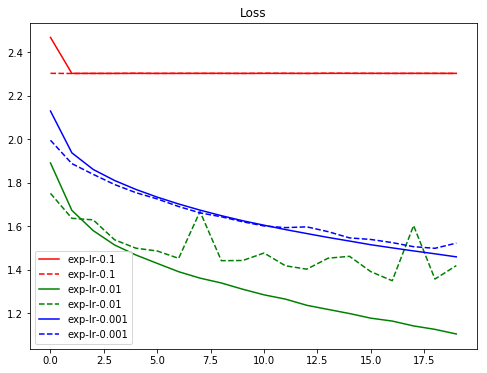

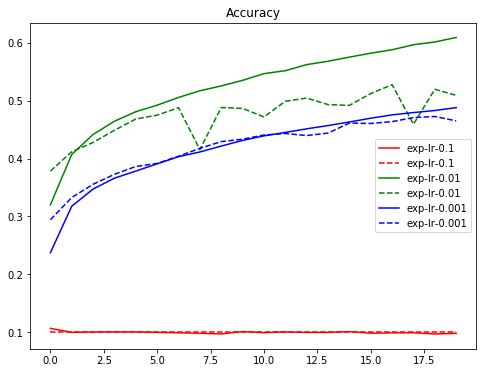

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results2 = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 256)               786688    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               32896     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 148us/step - loss: 2.1277 - acc: 0.2259 - val_loss: 1.9937 - val_acc: 0.2833
Epoch 2/20
50000/50000 [==============================] - 7s 132us/step - loss: 1.9275 - acc: 0.3159 - val_loss: 1.8870 - val_acc: 0.3356
Epoch 3/20
50000/50000 [==============================] - 7s 132us/step - loss: 1.8458 - acc: 0.3511 - val_loss: 1.8168 - val_acc: 0.3679
Epoch 4/20
50000/50000 [==============================] - 7s 131us/step - loss: 1.7914 - acc: 0.3728 - val_loss: 1.7672 - val_acc: 0.3819
Epoch 5/20
50000/50000 [==============================] - 7s 133us/step - loss: 1.7494 - acc: 0.3857 - val_loss: 1.7412 - val_acc: 0.3790
Epoch 6/20
50000/50000 [==============================] - 7s 133us/step - loss: 1.7205 - acc: 0.3946 - val_loss: 1.7036 - val_acc: 0.4078
Epoch 7/20
50000/50000 [==============================] - 7s 132us/step - loss: 1.6890 - acc: 0.4070 - val_loss: 1.6837 - 

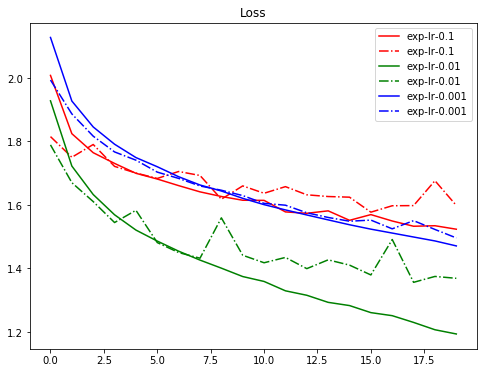

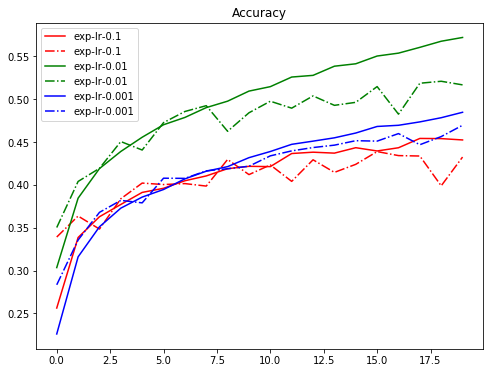

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '-.', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '-.', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()